In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats 

# Q1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [2]:
#importing claims and customer data table
claims_data= pd.read_csv(r"C:\Users\preet\Downloads\Python Foundation Case Study 3 - Insurance Claims Case Study (2)\claims.csv")
cust_data= pd.read_csv(r"C:\Users\preet\Downloads\Python Foundation Case Study 3 - Insurance Claims Case Study (2)\cust_demographics.csv")

# Q2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance

In [3]:
claims_data.dtypes
#here, mismatch is:
#1. claim_date as it should be in date and time format,
#2. claim_amount as it should be in float format as it contains numeric and decimals

claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [4]:
cust_data.dtypes
#here, mismatch is DateOfBirth as it should be in date and time format
#Contact is also in wrong format but i guess there is not much use of it so we can leave it as it is

CUST_ID         int64
gender         object
DateOfBirth    object
State          object
Contact        object
Segment        object
dtype: object

In [5]:
#setting proper formats of cust_table
cust_data['DateOfBirth']=pd.to_datetime(cust_data['DateOfBirth'], format= '%d-%b-%y')

 # Q3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the dollar sign.

In [6]:
#first replacing dollar sing so that we can convert it into integer in claims_data table
claims_data['claim_amount']=claims_data['claim_amount'].str.replace('$','')

#setting proper data types for claims_data table
claims_data['claim_amount']=claims_data['claim_amount'].astype('float64')
claims_data['claim_date']= pd.to_datetime(claims_data['claim_date'], format= '%m/%d/%Y')


C:\Users\preet\AppData\Local\Temp\ipykernel_10720\1816367156.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  claims_data['claim_amount']=claims_data['claim_amount'].str.replace('$','')


In [7]:
#renaming the column before merging
cust_data.rename(columns= {'CUST_ID': 'customer_id'}, inplace=True)
#now merging two tables
df= pd.merge(left = claims_data, right= cust_data, on='customer_id', how='inner')


# Q4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [8]:
alert_flag= df[(df.claim_type=='Injury only')& (df.police_report=='No')]
alert_flag

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
8,24050443,21831191,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3.0,Yes,Male,1977-05-17,NH,419-712-8513,Gold
21,7809917,63916778,Other causes,2017-07-22,Auto,No,Injury only,17800.0,1.0,No,Male,2066-09-07,IL,146-157-4572,Platinum
22,29205389,17004138,Natural causes,2017-06-25,Auto,No,Injury only,31380.0,1.0,No,Female,2065-08-13,WA,436-354-4682,Silver
33,18210740,80379865,Natural causes,2018-02-09,Auto,No,Injury only,18580.0,NaN,No,Male,1969-02-27,NM,427-513-8479,Gold
41,13167216,27205554,Driver error,2018-05-14,Auto,No,Injury only,16910.0,1.0,No,Male,1976-04-12,RI,521-912-8139,Silver
47,3673097,54642094,Driver error,2017-04-12,Auto,No,Injury only,19960.0,1.0,No,Male,1995-08-10,NY,963-813-1973,Silver
48,58245818,47091036,Driver error,2018-07-27,Home,No,Injury only,27230.0,1.0,No,Male,1986-10-22,SD,247-436-8713,Gold
97,76552623,56590042,Other causes,2017-11-06,Auto,No,Injury only,31498.5,4.0,Yes,Male,2067-01-12,AL,254-651-9452,Silver
103,82144259,92752865,Driver error,2017-04-25,Auto,No,Injury only,NaN,1.0,No,Male,1986-01-30,AK,143-219-5498,Silver
113,67043170,94448966,Other driver error,2018-10-16,Auto,No,Injury only,23760.0,1.0,No,Female,1984-06-20,MD,845-768-2513,Gold


# Q5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique

In [9]:
df[df.total_policy_claims>1].groupby(by= 'customer_id').total_policy_claims.sum().reset_index().sort_values('total_policy_claims',ascending=False)

,customer_id,total_policy_claims
126,46129941,8.0
230,77116501,7.0
49,18361978,7.0
173,59046302,6.0
94,35459428,6.0
...,...,...
141,49820646,2.0
142,50460892,2.0
146,51195864,2.0
147,51349085,2.0


# Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [10]:
df.duplicated().sum()
#there are no duplicate columns

0

# Q6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [11]:
# checking for missing or null values
df.isna().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
dtype: int64

In [12]:
#mean for continuous 
df.claim_amount.fillna(df.claim_amount.mean(),inplace=True)
#mode for categorical, since median and mode is same we'll chage it to median
df['total_policy_claims'].fillna(df.total_policy_claims.median(),inplace=True)


# Q7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
#### Children < 18
#### Youth 18-30
#### Adult 30-60
#### Senior > 60

In [13]:
#Here there are some columns where it is 2061 instead of 1961
#so we'll change it first
x= pd.DateOffset(months=1200 ) #100years * 12months = 1200 months
#calculating todays date
today= pd.Timestamp.today()
df.DateOfBirth= np.where(df.DateOfBirth>today, df.DateOfBirth - x , df.DateOfBirth )

In [14]:
#now we'll calculate the age
age= today.year - df.DateOfBirth.dt.year
age= age.reset_index()
age.rename(columns={'DateOfBirth':'Age' }, inplace= True)
#and make a new column age
df['Age']= age.Age


In [15]:
#now making the group
df.loc[(df.Age < 18),'AgeGroup'] = 'Children'
df.loc[(df.Age >=18) & (df.Age <30),'AgeGroup'] = 'Youth'
df.loc[(df.Age >=30) & (df.Age <60),'AgeGroup'] = 'Adult'
df.loc[(df.Age >=60),'AgeGroup'] = 'Senior'

# Q8. What is the average amount claimed by the customers from various segments?

In [16]:
df.groupby(by= 'Segment').claim_amount.sum().reset_index()

,Segment,claim_amount
0,Gold,4.811112e+06
1,Platinum,4.467787e+06
2,Silver,4.248536e+06


# Q9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [17]:
a= df[(df.claim_date<'2018-10-01')&(df.claim_date>'2018-09-11') ].claim_amount.sum()
print("the total claim amount based on incident cause for all the claims that have been",
      "done at least 20 days prior to 1st of October, 2018 is:",a )

the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018 is: 324678.8627450981


# Q10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes

In [18]:
b= df[((df.State=='TX')| (df.State== 'DE') |(df.State== 'AK'))& (df.AgeGroup=='Adult')].total_policy_claims.count()# In[ ]:
print("The no. of adults from TX, DE and AK claimed insurance for driver related issues and causes is:", b)

The no. of adults from TX, DE and AK claimed insurance for driver related issues and causes is: 53


# Q11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [19]:
c= df.groupby(by = ['Segment','gender']).claim_amount.max().reset_index()
c= pd.pivot_table(c, index= 'Segment', columns='gender', values= 'claim_amount')
c

gender,Female,Male
Segment,,
Gold,44700.5,47748.0
Platinum,48035.5,47610.0
Silver,48150.5,45287.0


array([<AxesSubplot:ylabel='Female'>, <AxesSubplot:ylabel='Male'>],
      dtype=object)

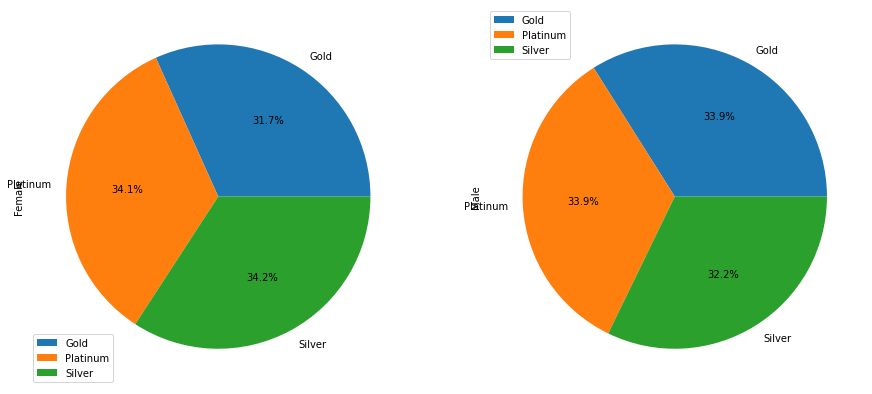

In [20]:
c.plot(kind= 'pie',subplots=True ,figsize= (15,10), autopct='%1.1f%%' )

# Q12.Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [21]:
d=df[df.incident_cause=='Driver error'].groupby(by= 'gender').claim_id.count().reset_index()
d= pd.pivot_table(d, index= 'gender', values= 'claim_id')
d# In[ ]:

,claim_id
gender,
Female,73
Male,188


<AxesSubplot:xlabel='gender'>

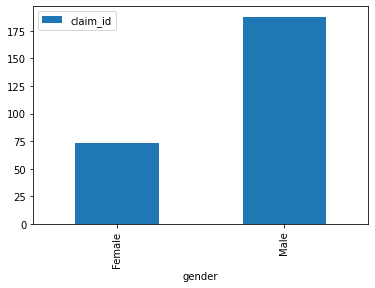

In [22]:
d.plot(kind='bar')

# Q13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart

In [38]:
e= df.groupby(by= df.AgeGroup).fraudulent.count().reset_index()
e= pd.pivot_table(e, index= 'AgeGroup', values= 'fraudulent')
e# In[ ]:

,fraudulent
AgeGroup,
Adult,802
Senior,75
Youth,208


<AxesSubplot:xlabel='AgeGroup'>

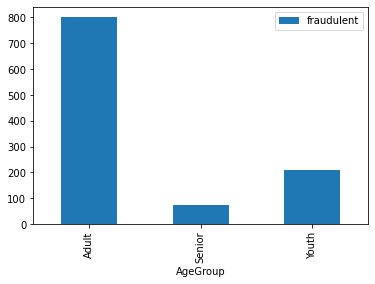

In [24]:
e.plot(kind= 'bar')

# Q14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [25]:
f= df.groupby(by= df.claim_date.dt.month).claim_amount.sum().reset_index()
f

,claim_date,claim_amount
0,1,1.331992e+06
1,2,1.169906e+06
2,3,1.320080e+06
3,4,1.293886e+06
4,5,1.114189e+06
5,6,1.278826e+06
6,7,1.379010e+06
7,8,9.111950e+05
8,9,9.828598e+05
9,10,1.447673e+06


<AxesSubplot:xlabel='claim_date'>

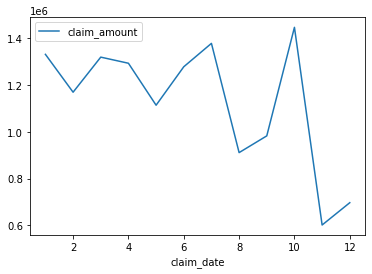

In [26]:
f.plot(kind= 'line', x= 'claim_date', y='claim_amount' )

# Q15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

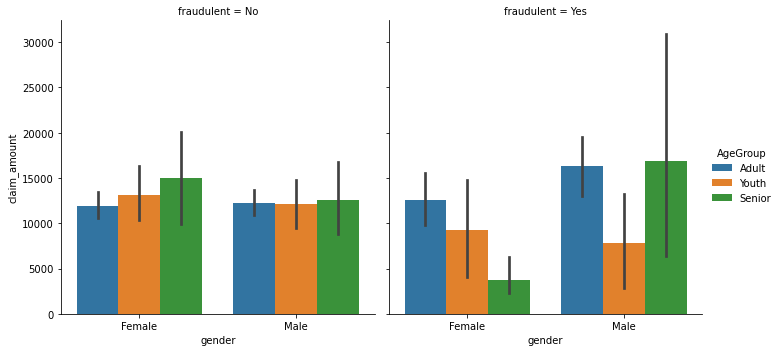

In [27]:
sns.catplot(data=df, x="gender", y="claim_amount", hue="AgeGroup", col="fraudulent", kind="bar")

 # Q16. Is there any similarity in the amount claimed by males and females?


### Ans.

 #### step1. define null hypothesis, Ho:
     Ho = no similarity in the amount claimed by males and female.
     
 #### step2. define alternate hypothesis, H1:
     Ha= there is similarity between amount claimed by males and female.
    
 #### step3. define CI :
     CI = 95%, pvalue= 0.05
    
 #### step4. perform test:
     perform CO-Efficient
    

In [120]:
claim_m =  df[df.gender=='Male'].claim_amount
claim_f = df[df.gender=='Female'].claim_amount

In [121]:
stats.ttest_ind(a= claim_m,b= claim_f)  

Ttest_indResult(statistic=0.9738138415066818, pvalue=0.33036643165116597)

### Business conclusion:
  * initial p-value= 0.05
  *  new-pvalue= 0.33036643165116597
##### Since, new p-value> initial p-value, we'll ACCEPT Ho.
* there is no similarity in the amount claimed by males and female.
        

# Q17. Is there any relationship between age category and segment?

### Ans.

 #### step1. define null hypothesis, Ho:
     Ho = there is no relationship between age category and segment.
     
 #### step2. define alternate hypothesis, H1:
     Ha= there is relationship between age category and segment.
    
 #### step3. define CI :
     CI = 95%, pvalue= 0.05
    
 #### step4. perform test:
     Chi-square test on cross tab, called dbs.

In [88]:
dbs= pd.crosstab(df.AgeGroup, df.Segment)
dbs

Segment,Gold,Platinum,Silver
AgeGroup,,,
Adult,276,267,259
Senior,28,26,21
Youth,71,69,68


In [89]:
stats.chi2_contingency(dbs)

(0.6494456910829914,
 0.9574138066351555,
 4,
 array([[277.18894009, 267.5797235 , 257.23133641],
        [ 25.92165899,  25.02304147,  24.05529954],
        [ 71.88940092,  69.39723502,  66.71336406]]))

### Business conclusion:
* As, dbs table & expected frequency table have differentiated values, it means Age-Category and Segment are dependent.
  * initial p-value= 0.05
  *  new-pvalue= 0.9574138066351555
##### Since, new p-value> initial p-value, we'll ACCEPT Ho.
        `

# Q18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

### Ans.

 #### step1. define null hypothesis, Ho:
     Ho = U<=$1000 OR U= $1000
     
 #### step2. define alternate hypothesis, H1:
     Ha= U>=$1000 OR U!=$1000
    
 #### step3. define CI :
     CI = 95%, pvalue= 0.05
    
 #### step4. perform test:
     Since, we want to calculate mean of 2 continuous variables, perform t-test.

In [122]:
stats.ttest_1samp(df.claim_amount,10000)

Ttest_1sampResult(statistic=6.082468636028012, pvalue=1.6383633097209731e-09)

### Business conclusion:
* Fiscal Average was greater than $10000.
  * initial p-value= 0.05
  *  new-pvalue= 1.6383633097209731e-09
##### Since, new p-value < initial p-value, we'll REJECT Ho.

# Q19. Is there any difference between age groups and insurance claims?

### Ans.

 #### step1. define null hypothesis, Ho:
     Ho =m1=m2=m3
         OR 
     Samples are from same population.
     
 #### step2. define alternate hypothesis, H1:
     Ha= m1!=m2!=m3
         OR
     Samples are from different population.
    
 #### step3. define CI :
     CI = 95%, pvalue= 0.05
    
 #### step4. perform test:
     F-Test | ANOVA

In [95]:
df.AgeGroup.value_counts()

Adult     802
Youth     208
Senior     75
Name: AgeGroup, dtype: int64

In [126]:
#Sample for AgeGroup 1, 2 and 3:
s1= df.loc[df.AgeGroup=='Adult', 'total_policy_claims']
s2= df.loc[df.AgeGroup=='Youth', 'total_policy_claims']
s3= df.loc[df.AgeGroup=='Senior','total_policy_claims']

In [127]:
#calculating mean of all 3 samples
m1= s1.mean()
m2= s2.mean()
m3= s3.mean()
print(m1)
print(m2)
print(m3)

1.5660847880299251
1.6538461538461537
1.5466666666666666


In [128]:
#performing test
stats.f_oneway(s1, s2, s3)

F_onewayResult(statistic=0.5240124814340866, pvalue=0.5922900196500376)

### Business conclusion:
  * initial p-value= 0.05
  *  new-pvalue= 0.5922900196500376
##### Since, new p-value> initial p-value, we'll ACCEPT Ho.
* Samples are from same population.

# Q20. Is there any relationship between total number of policy claims and the claimed amount?

### Ans.

 #### step1. define null hypothesis, Ho:
     Ho = there is no relationship between age category and segment.
     
 #### step2. define alternate hypothesis, H1:
     Ha= there is a relationship between age category and segment.
    
 #### step3. define CI :
     CI = 95%, pvalue= 0.05
    
 #### step4. perform test:
     Pearson Co-efficient

In [129]:
#performing test
stats.pearsonr(df.total_policy_claims, df.claim_amount)

(-0.01795295331890298, 0.5547051246400856)

### Business conclusion:
  * initial p-value= 0.05
  *  new-pvalue= 0.5547051246400856
##### Since, new p-value> initial p-value, we'll ACCEPT Ho.
* there is no relationship between age category and segment..